Pandas For Financial Data

In [2]:
from scipy import stats
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.dates import (WeekdayLocator, MONDAY)
import seaborn as sns
%matplotlib inline
from pandas_datareader import data, wb
style.use('fivethirtyeight')

In [3]:
start = dt.datetime(2014, 1, 1)
end = dt.datetime(2014,12,31)

msft = data.DataReader('MSFT',"quandl",start,end,access_key = "_yjtBk8iXoJD-wWBuNUW")[['AdjClose','AdjVolume']]
#msft_5 = pd.DataFrame(msft[:5])
#msft_5
msft.tail()


,AdjClose,AdjVolume
Date,,
2014-01-08,32.269454,59971700.0
2014-01-07,32.856007,35802800.0
2014-01-06,32.603338,43603700.0
2014-01-03,33.307202,31134800.0
2014-01-02,33.532800,30632200.0


In [7]:

def get(tickers,start,end):
    def dat(ticker):
        return data.DataReader(tickers, 'yahoo', start, end)
    datas = map(dat,tickers)
    return pd.concat(datas, keys=tickers,names =['Ticker','Date'])

#tickers = ['MCD','HP','GE','GOOG','FB','NFLX','AMZN','AA','DAL','UAL','PEP','KO']



In [5]:

def get(tickers,start,end):
    def dat(ticker):
        return data.DataReader(ticker,'yahoo',start,end)
    datas = map(dat,tickers)
    return pd.concat(datas, keys=tickers,names =['Ticker','Date'])

tickers = ['MCD','HP','GE','GOOG','FB','NFLX','AMZN','AA','DAL','UAL','PEP','KO']
#all_data = get(tickers, start, end)


In [6]:
# reset the index to make everything columns
just_closes = all_data[['Adj Close']].reset_index()
daily_closes_px = just_closes.pivot('Date','Ticker','Adj Close')
daily_closes_px.head()

Ticker,AA,AMZN,DAL,FB,GE,GOOG,HP,KO,MCD,NFLX,PEP,UAL
Date,,,,,,,,,,,,
2014-01-02,24.485683,397.970001,25.087599,54.709999,22.099945,554.481689,63.916985,33.790356,80.955902,51.831429,69.375946,37.730000
2014-01-03,24.578699,396.440002,26.473305,54.560001,22.083866,550.436829,64.538673,33.624149,81.065048,51.871429,69.494225,39.950001
2014-01-06,24.485683,393.630005,26.527647,57.200001,21.907068,556.573853,63.683857,33.466251,80.485641,51.367142,69.528008,39.360001
2014-01-07,24.508940,398.029999,26.065744,57.919998,21.931177,567.303589,64.950546,33.565975,80.930702,48.500000,70.542061,38.689999
2014-01-08,25.183287,401.920013,26.989544,58.230000,21.866892,568.484192,65.626625,33.192009,80.116180,48.712856,70.339241,41.020000


In [ ]:
#all_data.to_csv('/home/saazi/Documents/stocks_yahoo.csv')

In [ ]:
data = pd.read_csv('/home/saazi/ml/ml_models/Sharpe-Ratio-studies-master/Listings.csv', 
                     index_col = 0)
data.head()
# Collecting the data

# List of all the stocks tickers
stocks_ticker = data.index.tolist()
len(stocks_ticker)

In [8]:
x = pd.read_csv('/home/saazi/Documents/stocks_yahoo.csv')
x.head()

,Ticker,Date,High,Low,Open,Close,Volume,Adj Close
0,AAPL,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,39.172771
1,AAPL,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,39.383293
2,AAPL,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,39.820515
3,AAPL,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,40.236809
4,AAPL,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,40.172970


In [9]:
# reset the index to make everything columns
just_closing_prices = x[['Adj Close']].reset_index()
just_closing_prices[50:55]

,index,Adj Close
50,50,55.779045
51,51,55.779972
52,52,57.259331
53,53,57.722279
54,54,57.392685


In [11]:

daily_close_px = x.pivot('Date','Ticker','Adj Close')
daily_close_px.head()


Ticker,AA,AAPL,DAL,FB,GE,IBM,KO,MSFT,NFLX,PEP,TSLA,UAL
Date,,,,,,,,,,,,
2012-01-03,20.893423,39.172771,7.386483,NaN,14.380466,146.470383,27.820843,22.407425,10.320000,54.080856,28.080000,18.900000
2012-01-04,21.391426,39.383293,7.358922,NaN,14.537114,145.872879,27.646315,22.934759,11.492857,54.357780,27.709999,18.520000
2012-01-05,21.187698,39.820515,7.652909,NaN,14.529281,145.181015,27.515425,23.169132,11.328571,53.934254,27.120001,18.389999
2012-01-06,20.734968,40.236809,7.643724,NaN,14.607606,143.514221,27.340904,23.529055,12.327143,53.258232,26.910000,18.209999
2012-01-09,21.346159,40.172970,7.606975,NaN,14.772087,142.767349,27.340904,23.219353,14.025714,53.535160,27.250000,17.930000


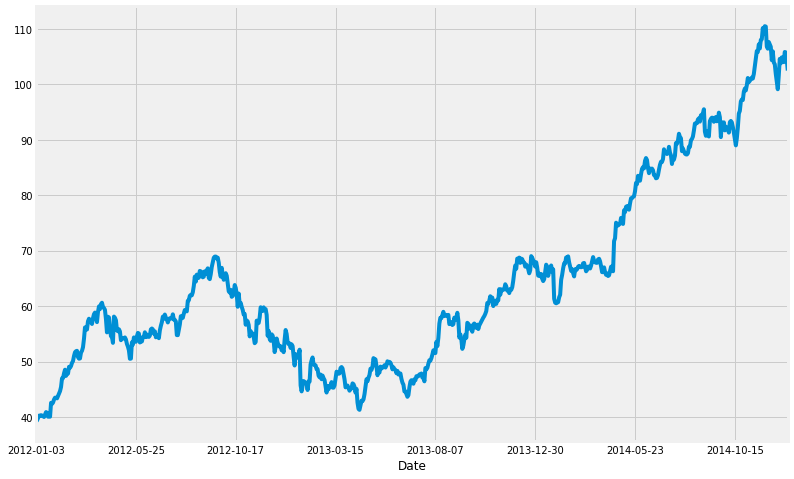

In [12]:
daily_close_px['AAPL'].plot(figsize=(12,8))
plt.show()

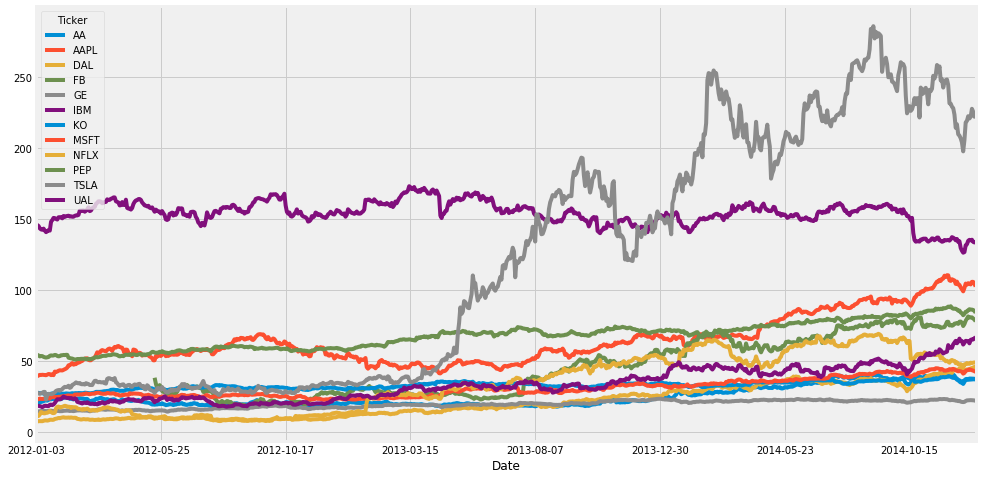

In [13]:
daily_close_px.plot(figsize=(15,8))
plt.show()

In [18]:
'''
msftV = x.Volume.loc['MSFT']
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)
plt.show()
'''

"\nmsftV = x.Volume.loc['MSFT']\nplt.bar(msftV.index, msftV)\nplt.gcf().set_size_inches(12,6)\nplt.show()\n"

Combined price and volumes

In [ ]:
top = plt.subplot2grid((4,4),(0,0), rowspan = 3, colspan=4)
top.plot(daily_close_px.index,daily_close_px['MSFT'],label='Adjusted Close')
plt.title('MSFT Adjusted Close price from 2012 - 2014')
plt.legend(loc=2)
bottom = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft Daily Trading Volume')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)

In [ ]:
subset = all_data.loc['MSFT'].loc['2014-12':'2014-12'].reset_index()
subset.head()

In [ ]:

subset['date_num'] = subset['Date'] \
.apply(lambda date: mdates.date2num(date.to_pydatetime()))
subset[:5]

In [ ]:
subset_as_tuples = [tuple(x) for x in subset[['date_num',
                                                'Open',
                                                'High',
                                                'Low',
                                                'Close']].values]

week_formatter = DateFormatter('%b %d') # e.g. Jan 12


In [ ]:
mondays = WeekdayLocator(MONDAY)  # major ticks on the mondays
#plt.figure(figsize=(15,8))
fig,ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
candlestick_ohlc(ax,subset_as_tuples,width=0.6,colorup='g',colordown='r')
plt.show()

In [ ]:
""" Linear regression with SciPy """
stock_returns = [0.065, 0.0265, -0.0593, -0.001, 0.0346]

mkt_returns = [0.055, -0.09, -0.041, 0.045, 0.022]
beta, alpha, r_value, p_value, std_err = stats.linregress(stock_returns, mkt_returns)
beta, alpha

In [ ]:
daily_pct_change = daily_close_px.pct_change()

In [ ]:
daily_pct_change.fillna(0, inplace=True)
daily_pct_change.iloc[:5,0:8]

In [ ]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.iloc[:10,:5]

In [ ]:
cum_daily_return.plot(figsize=(12,8))
#plt.legend(loc=2)
plt.show()

In [ ]:
aapl = daily_pct_change['AAPL']
tsla = daily_pct_change['TSLA']
aapl.hist(bins=50, figsize=(12,8))
plt.show()

In [ ]:
aapl.describe()
aapl.describe(percentiles=[0.025, 0.5, 0.975])

In [ ]:
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))
plt.show()

In [ ]:
f = plt.figure(figsize=(12,8))
ax = f.add_subplot(111)
stats.probplot(aapl, dist='norm', plot=ax)
plt.show()

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(y=daily_pct_change[['AAPL']], data=daily_pct_change)
plt.show()
#daily_pct_change[['AAPL']].plot(kind='box', figsize=(3,6))

In [ ]:
daily_pct_change.plot(kind='box', figsize=(12,8))
plt.show()

Scatter plots to show correlation between given pairs of stocks

In [ ]:
# function to create the scatterplot
def render_scatter_plot(data, x_stock_name,y_stock_name,xlim=None,ylim=None):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name],data[y_stock_name])
    if xlim is not None: ax.set_xlim(xlim)
    
    ax.autoscale(False)
    ax.vlines(0 ,-10, 10)
    ax.hlines(0 ,-10, 10)
    ax.plot((-10,10), (-10, 10))
    ax.set_xlabel(x_stock_name)
    ax.set_ylabel(y_stock_name)
    

Low correlation(0.2)

In [ ]:
limits = [-0.15, 0.15]
render_scatter_plot(daily_pct_change,'MSFT','AAPL',xlim = limits)

High correlation(0.76)

In [ ]:
render_scatter_plot(daily_pct_change, 'DAL', 'UAL', xlim=limits)

correlation comparison for all stocks

In [ ]:
# all stocks against each other, with a KDE(kernel density estimation) graph in the diagonal
pd.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,
figsize=(12,12))
plt.show()

In [ ]:
msftAC = msft['2012']['Adj Close']
msft.head()
sample = msftAC['2012']
sample.plot(figsize=(12,8))
plt.show()

In [ ]:
sample.plot(figsize=(12,8))
sample.rolling(window= 5).mean().plot(figsize=(12,8))
sample.rolling(window= 20).mean().plot(figsize=(12,8))
plt.show()

Based on Time series Analysis tutorials on youtube(codebasics)

In [ ]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2014,12,31)

aapl = data.DataReader('AAPL',"yahoo",start,end)
aapl[:5]

In [ ]:
aapl.index

In [ ]:
aapl['2013-01']

In [ ]:
aapl['2013-01'].Close.mean()

In [ ]:
aapl['2013-02-01':'2013-02-11']

In [ ]:
#resampling and plotting
plt.figure(figsize=(15,8))
aapl.Close.resample('M').mean().plot()
plt.show()

In [ ]:
#resampling by quarter
plt.figure(figsize=(15,8))
aapl.Close.resample('Q').mean().plot(kind='bar')
plt.show()

In [ ]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from pandas_datareader.data import DataReader
from datetime import date
import quandl

# Quandl api key == _yjtBk8iXoJD-wWBuNUW
#quandl.ApiConfig.api_key = "_yjtBk8iXoJD-wWBuNUW"

plt.style.use('fivethirtyeight')
%matplotlib inline
# Getting the stocks data
data = pd.read_csv('/home/saazi/ml/ml_models/Sharpe-Ratio-studies-master/Listings.csv', 
                     index_col = 0)
data.head()
# Collecting the data

# List of all the stocks tickers
stocks_ticker = data.index.tolist()

# Initialize the parameters
start = date(2014, 1, 1)
end = date(2015, 1, 15)

stocks = pd.DataFrame()
error_list =[]
x = 0

# Data of the NASDAQ 100
#try :
tickers = stocks_ticker[:30]
new_selection = DataReader(tickers, 'quandl', start, end,access_key = "_yjtBk8iXoJD-wWBuNUW")
#new_selection.rename(tickers, inplace=True)
#stocks = pd.concat([stocks, new_selection], axis=1, sort=False)

# some values in the list are not up to date    
#except KeyError :  
 #   continue 


In [ ]:
new_selection.tail(50)

In [1]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
len(get_available_datasets())

295